In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [2]:
data = sns.load_dataset("titanic")

data.fillna({'age' : data['age'].median()}, inplace=True)
data.fillna({'embarked': data['embarked'].mode()[0]}, inplace=True)


# changing into numbers
data['sex'] = data['sex'].map({'male':0,'female':1})
data["embarked"] = data["embarked"].map({"S": 0, "C": 1, "Q": 2})

X = data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
y = data['survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)

classification_report_dt = classification_report(y_test,y_pred_dt)
print(classification_report_dt)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       105
           1       0.76      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [5]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

classification_report_rf = classification_report(y_test,y_pred_rf)
print(classification_report_rf)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



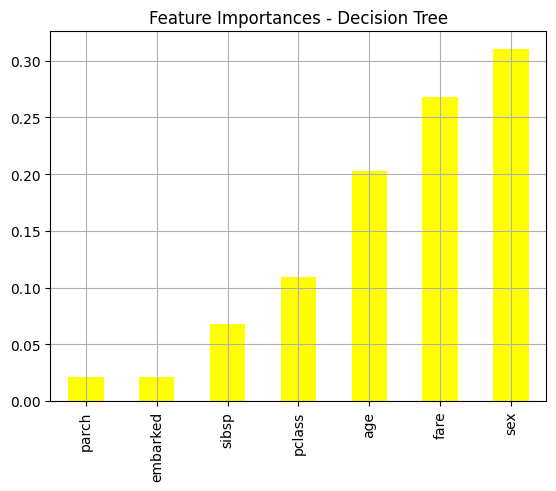

In [11]:
feature = pd.Series(dt.feature_importances_, index=X_train.columns) 
feature.sort_values().plot(kind='bar' , color='yellow')
plt.title("Feature Importances - Decision Tree")
plt.grid()

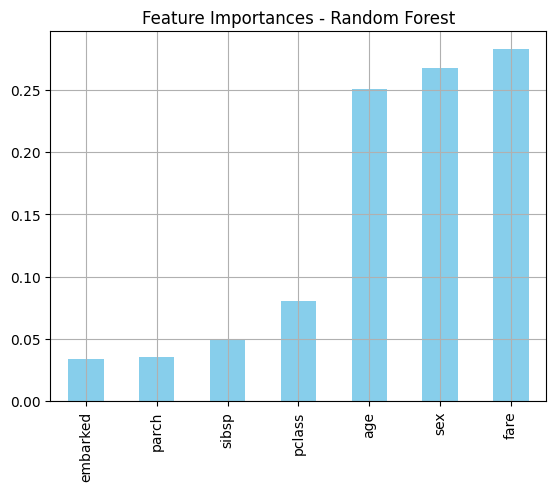

In [10]:
features= pd.Series(rf.feature_importances_, index=X_train.columns)
features.sort_values().plot(kind="bar", color='skyblue')
plt.title("Feature Importances - Random Forest")
plt.grid()
plt.show()

### Expected Insights:-

- Random Forest often performs better than a single Decision Tree in terms of accuracy and generalization.
- Feature importance plot shows which input variables (e.g. Sex, Age, Fare) were most influential in predictions.

> in Decision Tree highest importance was given to sex while in randomForest highest importance was given to fare